In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup
import requests 

# Web Scraping the Portuguese Minimum Wage data from Wikipedia

url = 'https://pt.wikipedia.org/wiki/Sal%C3%A1rio_m%C3%ADnimo#Portugal'

page = requests.get(url)

soup = BeautifulSoup(page.text, 'html')

In [61]:
print(soup)

<!DOCTYPE html>
<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-1 vector-feature-appearance-pinned-clientpref-1 vector-feature-night-mode-enabled skin-theme-clientpref-day vector-sticky-header-enabled vector-toc-available" dir="ltr" lang="pt">
<head>
<meta charset="utf-8"/>
<title>Salário mínimo – Wikipédia, a enciclopédia livre</title>
<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-cont

In [62]:
table = soup.find_all('table')[4]

In [63]:
print(table)

<table border="1" cellpadding="4" cellspacing="0" class="wikitable sortable" style="border:1px solid#aaa; border-collapse:collapse">
<caption>
</caption>
<tbody><tr bgcolor="#efefef">
<th><div style="text-align: center;"><b>Efectivo em</b></div></th>
<th><div style="text-align: center;"><b>Portugal Continental</b></div></th>
<th><div style="text-align: center;"><b>R. A. Dos Açores</b></div></th>
<th><div style="text-align: center;"><b>R. A. Da Madeira</b></div>
</th></tr>
<tr>
<td><div style="text-align: center;">1 de Janeiro de 2007</div>
</td>
<td><center> 403,00 €</center></td>
<td><center> 423,15 €</center></td>
<td><center> 411,16 €
</center></td></tr>
<tr>
<td><div style="text-align: center;">1 de Janeiro de 2008</div>
</td>
<td><center> 426,00 €</center></td>
<td><center> 447,30 €</center></td>
<td><center> 434,52 €
</center></td></tr>
<tr>
<td><div style="text-align: center;">1 de Janeiro de 2009</div>
</td>
<td><center> 450,00 €</center></td>
<td><center> 472,50 €</center></td

In [64]:
minwage_title = table.find_all('th')

minwage_titles_table = [title.text.strip() for title in minwage_title]

In [65]:
print(minwage_titles_table)

['Efectivo em', 'Portugal Continental', 'R. A. Dos Açores', 'R. A. Da Madeira']


In [66]:
data_rows=[]

In [67]:
minwage_values = table.find_all('tr')

for row in minwage_values[1:]:
    ind_data = row.find_all('td')
    ind_data_ready = [data.text.strip() for data in ind_data]
    data_rows.append(ind_data_ready)

In [68]:
data_rows

[['1 de Janeiro de 2007', '403,00 €', '423,15 €', '411,16 €'],
 ['1 de Janeiro de 2008', '426,00 €', '447,30 €', '434,52 €'],
 ['1 de Janeiro de 2009', '450,00 €', '472,50 €', '459,00 €'],
 ['1 de Janeiro de 2010', '475,00 €', '498,75 €', '484,00 €'],
 ['1 de Janeiro de 2011', '485,00 €', '509,25 €', '494,00 €'],
 ['Salário Mínimo inalterado em 2012 e 2013 e início de 2014'],
 ['1 de Outubro de 2014', '505,00 €', '530,25 €', '515,00 €'],
 ['1 de Janeiro de 2016', '530,00 €', '556,50 €', '540,60 €'],
 ['1 de Janeiro de 2017', '557,00 €', '584,85 €', '568,14 €'],
 ['1 de Janeiro de 2018', '580,00 €', '609,00 €', '592,00 €'],
 ['1 de Janeiro de 2019', '600,00 €', '630,00 €', '615,00 €'],
 ['1 de Janeiro de 2020', '635,00 €', '666,75 €', '650,88 €'],
 ['1 de Janeiro de 2021', '665,00 €', '698,25 €', '682,00 €'],
 ['1 de Janeiro de 2022', '705,00 €', '740,25 €', '723,00 €'],
 ['1 de Janeiro de 2023', '760,00 €', '798,00 €', '785,00 €'],
 ['1 de Janeiro de 2024', '820,00 €', '861,00 €', '850

In [69]:
df = pd.DataFrame(data = data_rows, columns = minwage_titles_table)

In [70]:
df.head(25)

,Efectivo em,Portugal Continental,R. A. Dos Açores,R. A. Da Madeira
0,1 de Janeiro de 2007,"403,00 €","423,15 €","411,16 €"
1,1 de Janeiro de 2008,"426,00 €","447,30 €","434,52 €"
2,1 de Janeiro de 2009,"450,00 €","472,50 €","459,00 €"
3,1 de Janeiro de 2010,"475,00 €","498,75 €","484,00 €"
4,1 de Janeiro de 2011,"485,00 €","509,25 €","494,00 €"
5,Salário Mínimo inalterado em 2012 e 2013 e iní...,None,None,None
6,1 de Outubro de 2014,"505,00 €","530,25 €","515,00 €"
7,1 de Janeiro de 2016,"530,00 €","556,50 €","540,60 €"
8,1 de Janeiro de 2017,"557,00 €","584,85 €","568,14 €"
9,1 de Janeiro de 2018,"580,00 €","609,00 €","592,00 €"


In [71]:
df.drop(columns = ['R. A. Dos Açores','R. A. Da Madeira'], inplace = True)

df

,Efectivo em,Portugal Continental
0,1 de Janeiro de 2007,"403,00 €"
1,1 de Janeiro de 2008,"426,00 €"
2,1 de Janeiro de 2009,"450,00 €"
3,1 de Janeiro de 2010,"475,00 €"
4,1 de Janeiro de 2011,"485,00 €"
5,Salário Mínimo inalterado em 2012 e 2013 e iní...,None
6,1 de Outubro de 2014,"505,00 €"
7,1 de Janeiro de 2016,"530,00 €"
8,1 de Janeiro de 2017,"557,00 €"
9,1 de Janeiro de 2018,"580,00 €"


In [72]:
df.rename(columns = {'Efectivo em': 'Year', 'Portugal Continental':'Minimum Wage'}, inplace = True)

In [73]:
# Adding the numeric values to the years 2012,2013 and 2015. Previsouly, they were all combined in the same line with
# a piece of text indicating that the minimum wage was stagnant in this period with the exception of 2015 that was completely missing.


missing_years = pd.DataFrame({'Year':[2012, 2013, 2015], 'Minimum Wage':['485,00 €','485,00 €','505,00 €']})

In [74]:
growth_table = pd.concat([df, missing_years], ignore_index=True)

In [75]:
growth_table.drop(index=5, inplace=True)

In [76]:
# Transforming the data to a more standard and consistent format

growth_table['Year'].str.split()

growth_table['Year'] = growth_table['Year'].apply(lambda x: str(x).strip().split()[-1]).astype(int)

In [77]:
growth_table.sort_values(by='Year', inplace=True)

growth_table.reset_index(drop=True, inplace=True)

In [78]:
growth_table['Minimum Wage'] = growth_table['Minimum Wage'].apply(lambda x: str(x).split(',')[0])

# Changing the minimum wage values to annual values

growth_table['Minimum Wage'] = growth_table['Minimum Wage'].astype(int) * 14

In [79]:
# Creating a Minimum Wage Growth column

growth_table['Min Wage Growth %'] = growth_table['Minimum Wage'].astype('Float64').pct_change().round(4) * 100

In [80]:
growth_table

,Year,Minimum Wage,Min Wage Growth %
0,2007,5642,<NA>
1,2008,5964,5.71
2,2009,6300,5.63
3,2010,6650,5.56
4,2011,6790,2.11
5,2012,6790,0.0
6,2013,6790,0.0
7,2014,7070,4.12
8,2015,7070,0.0
9,2016,7420,4.95


In [81]:
# Manually inputting the average wages because the most reliable source (Pordata) only provided values in graphical format.

average_wage = [15689, 16099, 16519, 16750, 16653, 16230, 16624, 16379, 16451, 16743, 17116, 17601, 18518, 18860, 19851, 21131, 22933]

In [82]:
# Adding those values to the dataframe

while len(average_wage) < len(growth_table):
                               average_wage.append(np.nan)

average_wage = pd.Series(average_wage, dtype='Int64')

growth_table['Average Wage'] = average_wage

In [83]:
# Creating an Average Wage Growth column


growth_table['Avg Wage Growth %'] = growth_table['Average Wage'].pct_change().round(4) * 100

C:\Users\tomas\AppData\Local\Temp\ipykernel_22764\1392082911.py:4: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  growth_table['Avg Wage Growth %'] = growth_table['Average Wage'].pct_change().round(4) * 100


In [84]:
# Manually inputting the inflation rate values because the most reliable source (Pordata) only provided values in graphical format.

inflation = [2.45, 2.59, -0.84, 1.4, 3.65, 2.77, 0.27, -0.28, 0.49, 0.61, 1.37, 0.99, 0.34, -0.01, 1.27, 7.83, 4.31, 2.42]

# Adding those values to the dataframe

while len(inflation) < len(growth_table):
    inflation.append(pd.NA)
    
growth_table['Inflation Growth %'] = inflation

growth_table['Inflation Growth %'] = growth_table['Inflation Growth %'].astype('Float64')

In [85]:
growth_table['Diff Min Wage - Inflation'] = growth_table['Min Wage Growth %'] - growth_table['Inflation Growth %']
growth_table['Diff Avg Wage - Inflation'] = growth_table['Avg Wage Growth %'] - growth_table['Inflation Growth %']


growth_table

,Year,Minimum Wage,Min Wage Growth %,Average Wage,Avg Wage Growth %,Inflation Growth %,Diff Min Wage - Inflation,Diff Avg Wage - Inflation
0,2007,5642,<NA>,15689,<NA>,2.45,<NA>,<NA>
1,2008,5964,5.71,16099,2.61,2.59,3.12,0.02
2,2009,6300,5.63,16519,2.61,-0.84,6.47,3.45
3,2010,6650,5.56,16750,1.4,1.4,4.16,0.0
4,2011,6790,2.11,16653,-0.58,3.65,-1.54,-4.23
5,2012,6790,0.0,16230,-2.54,2.77,-2.77,-5.31
6,2013,6790,0.0,16624,2.43,0.27,-0.27,2.16
7,2014,7070,4.12,16379,-1.47,-0.28,4.4,-1.19
8,2015,7070,0.0,16451,0.44,0.49,-0.49,-0.05
9,2016,7420,4.95,16743,1.77,0.61,4.34,1.16


In [86]:
# Generating a visualization-friendly table by removing all null values from the original DataFrame

viz_growth_table = growth_table.dropna(subset=['Min Wage Growth %','Average Wage'])

In [87]:
viz_growth_table

,Year,Minimum Wage,Min Wage Growth %,Average Wage,Avg Wage Growth %,Inflation Growth %,Diff Min Wage - Inflation,Diff Avg Wage - Inflation
1,2008,5964,5.71,16099,2.61,2.59,3.12,0.02
2,2009,6300,5.63,16519,2.61,-0.84,6.47,3.45
3,2010,6650,5.56,16750,1.4,1.4,4.16,0.0
4,2011,6790,2.11,16653,-0.58,3.65,-1.54,-4.23
5,2012,6790,0.0,16230,-2.54,2.77,-2.77,-5.31
6,2013,6790,0.0,16624,2.43,0.27,-0.27,2.16
7,2014,7070,4.12,16379,-1.47,-0.28,4.4,-1.19
8,2015,7070,0.0,16451,0.44,0.49,-0.49,-0.05
9,2016,7420,4.95,16743,1.77,0.61,4.34,1.16
10,2017,7798,5.09,17116,2.23,1.37,3.72,0.86


C:\Users\tomas\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\tomas\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\tomas\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\tomas\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

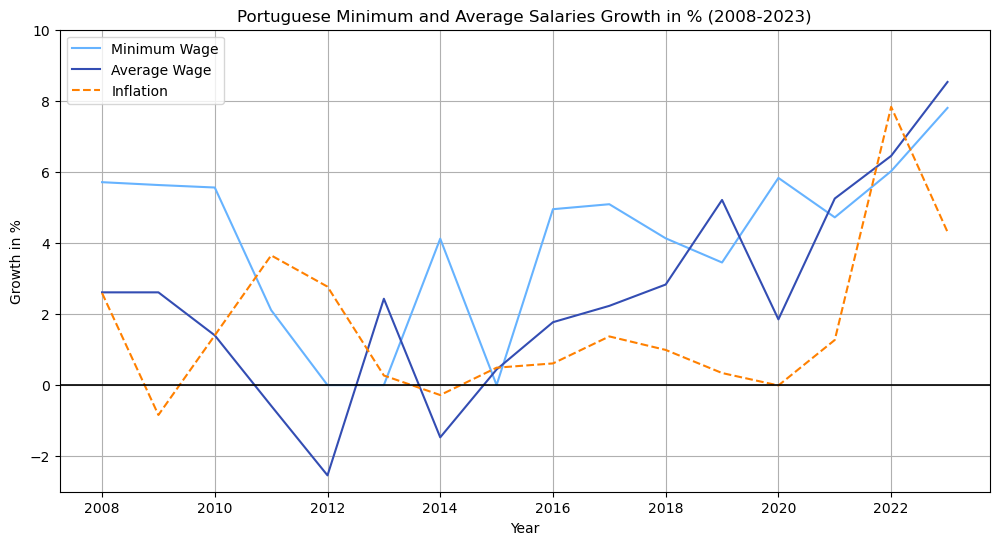

In [88]:
plt.figure(figsize=(12,6))

sns.lineplot(data=viz_growth_table, x='Year', y='Min Wage Growth %', label='Minimum Wage', color=(0.4, 0.7, 1))
sns.lineplot(data=viz_growth_table, x='Year', y='Avg Wage Growth %', label='Average Wage', color=(0.2, 0.3, 0.7))
sns.lineplot(data=viz_growth_table, x='Year', y='Inflation Growth %', label='Inflation', linestyle='dashed', color=(1, 0.5, 0))


plt.ylim(-3,10)
plt.title('Portuguese Minimum and Average Salaries Growth in % (2008-2023)')
plt.xlabel('Year')
plt.ylabel('Growth in %')
plt.grid(True)
plt.axhline(0, color='black', linewidth=1.2, linestyle="-")


In [91]:
# Filtering the data that will be plotted in the next bar plot
new_viz = viz_growth_table[['Year', 'Diff Min Wage - Inflation', 'Diff Avg Wage - Inflation']]

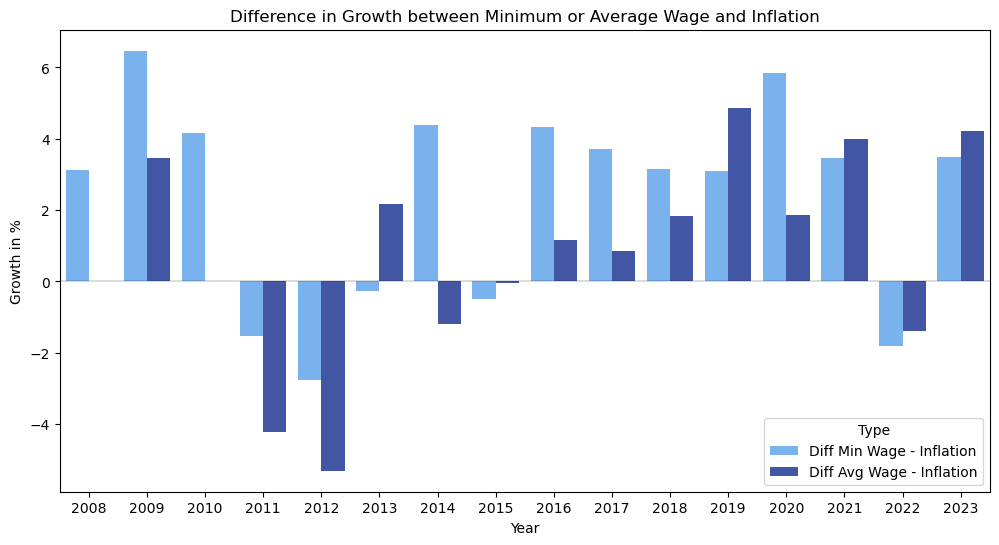

In [108]:
# Melting the filtered data so I can create a bar plot for both the 'Min Wage - Inflation'
# and the 'Avg Wage - Inflation' variables


df_melted = new_viz.melt(
    id_vars='Year',
    var_name='Type',
    value_name='Growth in %'
)

plt.figure(figsize=(12,6))
sns.barplot(
    data=df_melted,
    x='Year',
    y='Growth in %',
    hue='Type',
    palette={'Diff Min Wage - Inflation':(0.4, 0.7, 1) , 'Diff Avg Wage - Inflation': (0.2, 0.3, 0.7)}
)

plt.title('Difference in Growth between Minimum or Average Wage and Inflation')
plt.axhline(0, color='black', linewidth=0.2, linestyle="-")


In [ ]:
"""
Some quick notes:
- It's clear that the Troika years significantly impacted the purchasing power of the Portuguese population between 2011 and 2014.
- The COVID-19 pandemic is another event that has notably affected these variables in recent years.
- Initially, I wanted to dive deeper into this small project by using the median Portuguese wage instead of the average wage, which is 
heavily influenced by higher salaries. However, I couldn't find any reliable data sources for the median wage over the past 15 years.
To give you an idea, the median wage in Portugal in 2021 was around €13,430 annually, which is still far behind the €19,851 average wage.
"""
